In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics

In [2]:
train_df = pd.read_csv('train_data.csv')

In [3]:
train_df.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,Jordan,2008,9.343,0.766,64.22,NaN,-0.127,0.709,0.669,0.331,862,4.930
1,Estonia,2013,10.299,0.901,67.48,0.754,-0.201,0.726,0.702,0.199,534,5.367
2,Sweden,2018,10.881,0.931,72.60,0.942,0.077,0.263,0.823,0.161,1649,7.375
3,Tajikistan,2006,7.554,0.724,60.64,0.702,-0.088,0.768,0.566,0.195,1682,4.613
4,Kuwait,2014,10.945,NaN,65.80,NaN,NaN,NaN,NaN,NaN,925,6.180


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1533 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [5]:
train_df.isna().sum()

Country name                         0
year                                 0
Log GDP per capita                  26
Social support                      10
Healthy life expectancy at birth    37
Freedom to make life choices        22
Generosity                          71
Perceptions of corruption           86
Positive affect                     17
Negative affect                     14
ID                                   0
Life Ladder                          0
dtype: int64

In [6]:
train_df['Log GDP per capita'].fillna(train_df['Log GDP per capita'].median(), inplace = True)
train_df['Social support'].fillna(train_df['Social support'].median(), inplace = True)
train_df['Healthy life expectancy at birth'].fillna(train_df['Healthy life expectancy at birth'].median(), inplace = True)
train_df['Freedom to make life choices'].fillna(train_df['Freedom to make life choices'].median(), inplace = True)
train_df['Generosity'].fillna(train_df['Generosity'].median(), inplace = True)
train_df['Perceptions of corruption'].fillna(train_df['Perceptions of corruption'].median(), inplace = True)
train_df['Positive affect'].fillna(train_df['Positive affect'].median(), inplace = True)
train_df['Negative affect'].fillna(train_df['Negative affect'].median(), inplace = True)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1559 non-null   float64
 3   Social support                    1559 non-null   float64
 4   Healthy life expectancy at birth  1559 non-null   float64
 5   Freedom to make life choices      1559 non-null   float64
 6   Generosity                        1559 non-null   float64
 7   Perceptions of corruption         1559 non-null   float64
 8   Positive affect                   1559 non-null   float64
 9   Negative affect                   1559 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

**Loading the test data:**

In [8]:
test_df.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
0,Spain,2020,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317,1614
1,Poland,2017,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203,1405
2,Lebanon,2012,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339,974
3,Malaysia,2011,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155,1055
4,Canada,2020,10.730,0.931,74.00,0.887,0.050,0.434,0.796,0.307,307


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    int64  
 2   Log GDP per capita                380 non-null    float64
 3   Social support                    387 non-null    float64
 4   Healthy life expectancy at birth  372 non-null    float64
 5   Freedom to make life choices      380 non-null    float64
 6   Generosity                        372 non-null    float64
 7   Perceptions of corruption         366 non-null    float64
 8   Positive affect                   385 non-null    float64
 9   Negative affect                   388 non-null    float64
 10  ID                                390 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 33.6+ KB


In [10]:
test_df.isna().sum()

Country name                         0
year                                 0
Log GDP per capita                  10
Social support                       3
Healthy life expectancy at birth    18
Freedom to make life choices        10
Generosity                          18
Perceptions of corruption           24
Positive affect                      5
Negative affect                      2
ID                                   0
dtype: int64

In [13]:
train_df.describe()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.00000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
mean,2013.131495,9.364547,0.812833,63.375547,0.74218,-0.000811,0.751324,0.708687,0.267557,974.962797,5.469321
std,4.206026,1.150580,0.118393,7.394332,0.14134,0.159706,0.181928,0.107446,0.084056,562.023107,1.113280
min,2005.000000,6.635000,0.290000,32.300000,0.26000,-0.335000,0.035000,0.322000,0.083000,0.000000,2.375000
25%,2010.000000,8.474000,0.753500,58.700000,0.64900,-0.106500,0.699500,0.624500,0.207000,494.500000,4.649500
50%,2013.000000,9.456000,0.835000,65.180000,0.76300,-0.025000,0.804000,0.721000,0.258000,973.000000,5.374000
75%,2017.000000,10.313500,0.905000,68.400000,0.85350,0.084000,0.868000,0.798000,0.319000,1459.500000,6.272500
max,2020.000000,11.648000,0.987000,77.100000,0.98500,0.698000,0.983000,0.944000,0.705000,1948.000000,8.019000


In [14]:
train_df['Country name'].value_counts()

Jordan        15
Mexico        15
Kazakhstan    14
Egypt         14
Niger         14
              ..
Cuba           1
Guyana         1
Maldives       1
Suriname       1
Belize         1
Name: Country name, Length: 165, dtype: int64

<AxesSubplot:xlabel='Negative affect', ylabel='Positive affect'>

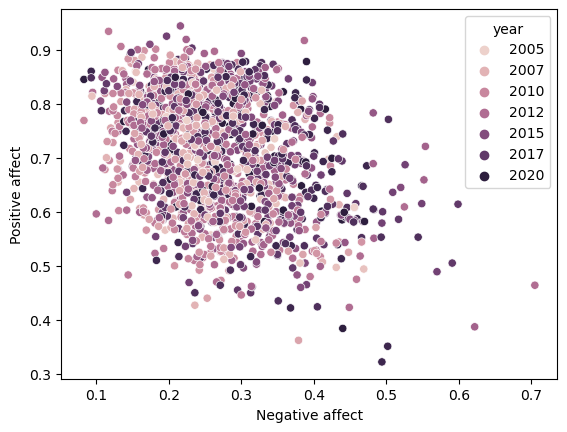

In [15]:
sns.scatterplot(data = train_df, x = 'Negative affect', y = 'Positive affect', hue = 'year')

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Perceptions of corruption'>

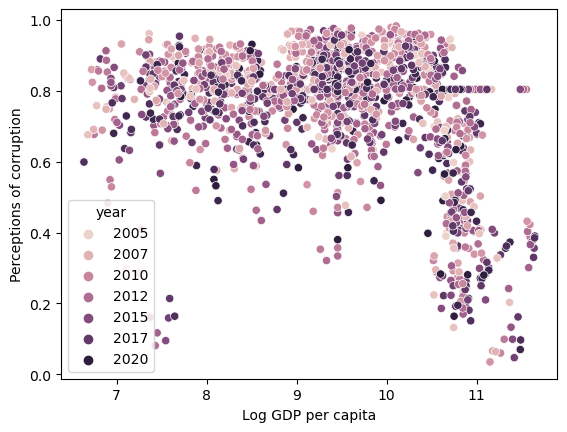

In [16]:
sns.scatterplot(data = train_df, x = 'Log GDP per capita', y = 'Perceptions of corruption', hue = 'year')

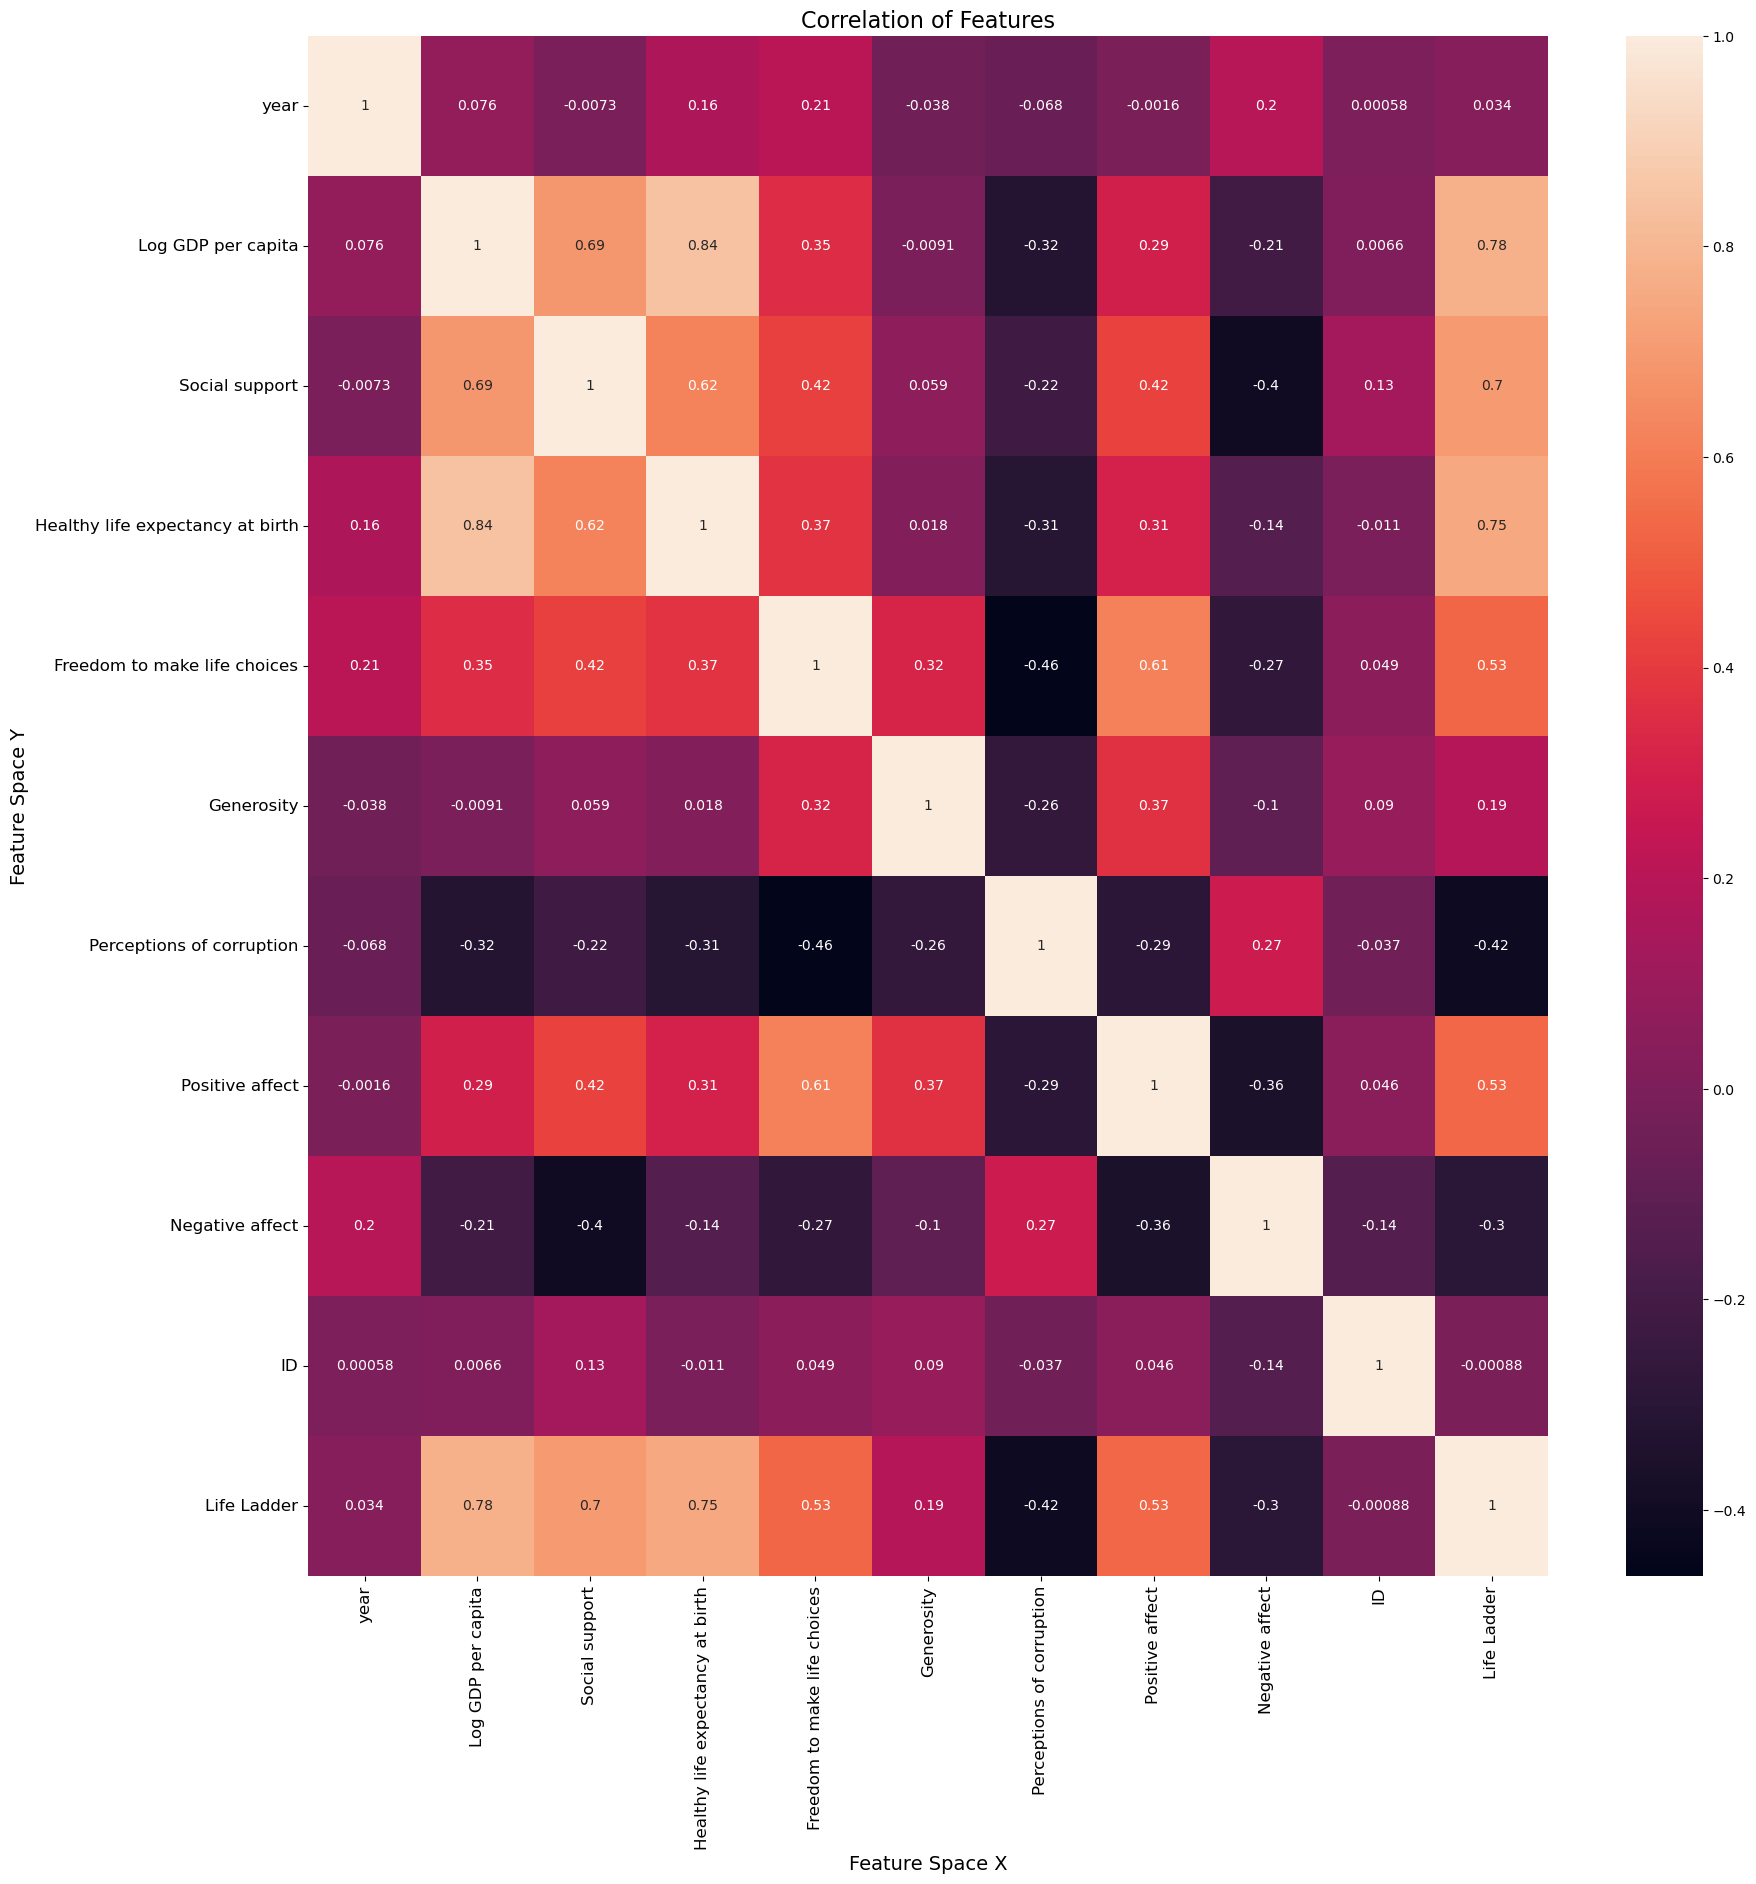

In [17]:
figure = plt.figure(figsize=[20, 20])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [18]:
train_df.drop('Country name', axis = 1, inplace = True)

year


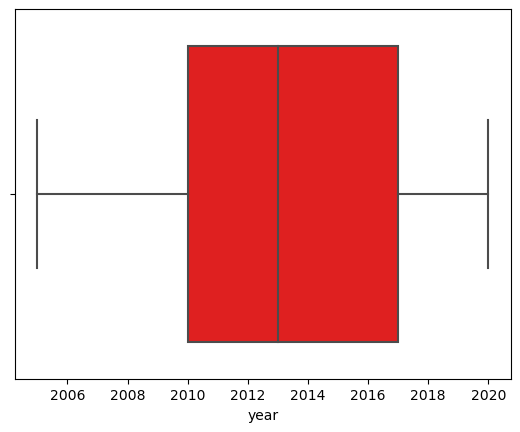

Log GDP per capita


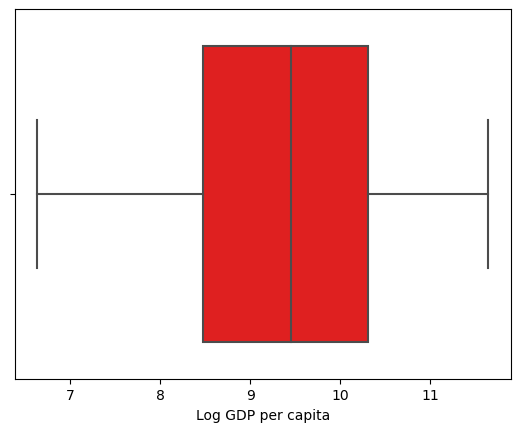

Social support


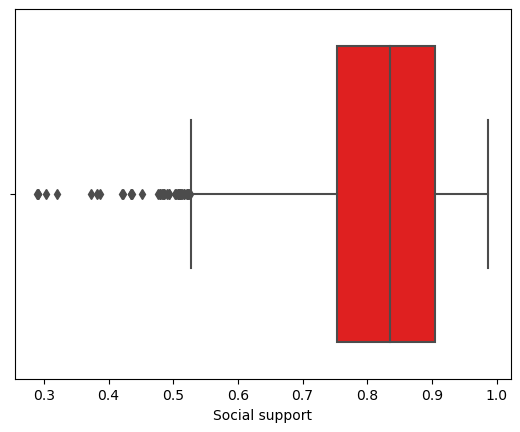

Healthy life expectancy at birth


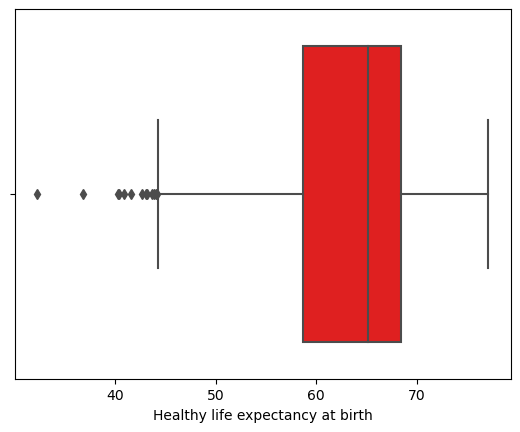

Freedom to make life choices


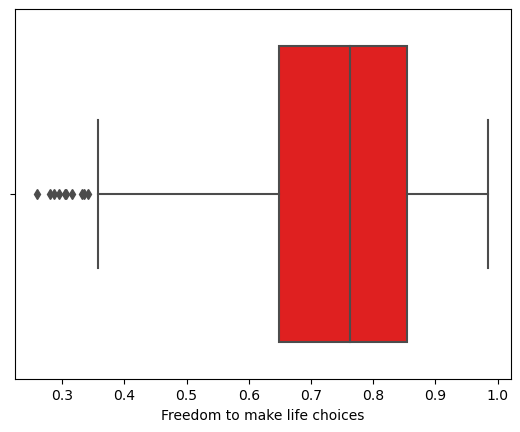

Generosity


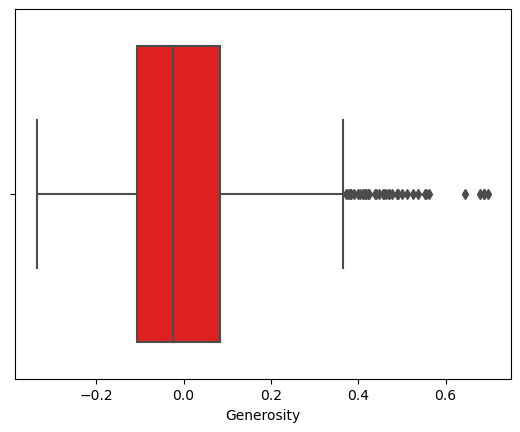

Perceptions of corruption


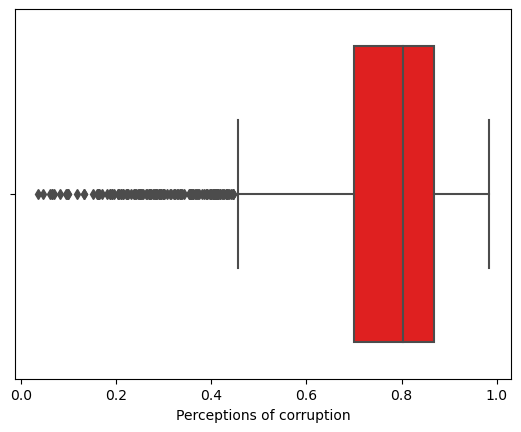

Positive affect


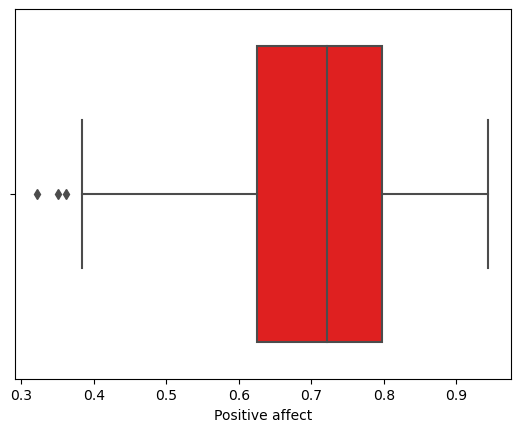

Negative affect


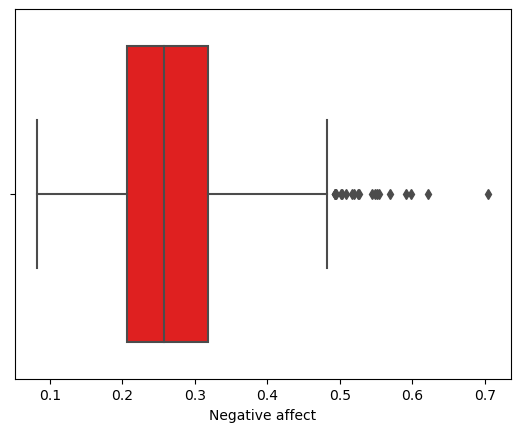

ID


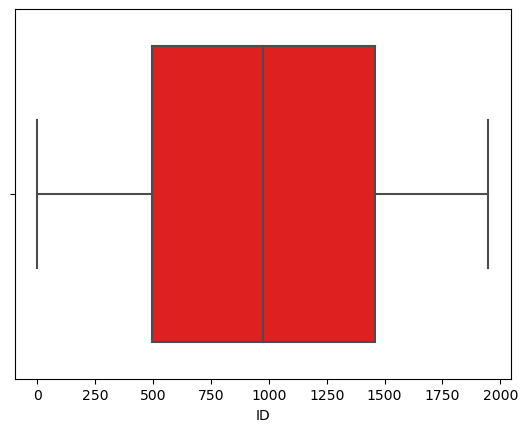

Life Ladder


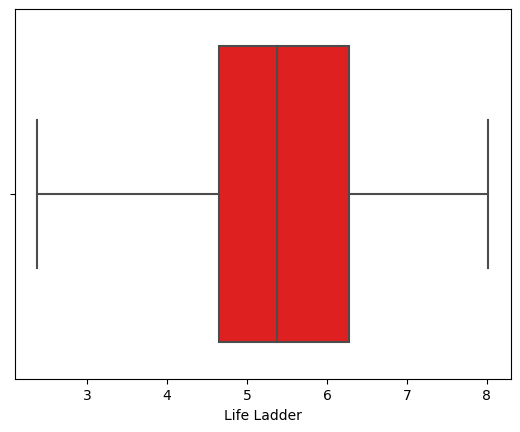

In [19]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [20]:
def get_bounds(train_df, col):
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [21]:
num_col = ['Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
          'Perceptions of corruption', 'Positive affect', 'Negative affect']

In [22]:
for col in num_col:
    Upper, Lower = get_bounds(train_df, col)
    train_df[col] = np.where(train_df[col]>Upper, Upper, train_df[col])
    train_df[col] = np.where(train_df[col]<Lower, Lower, train_df[col])

year


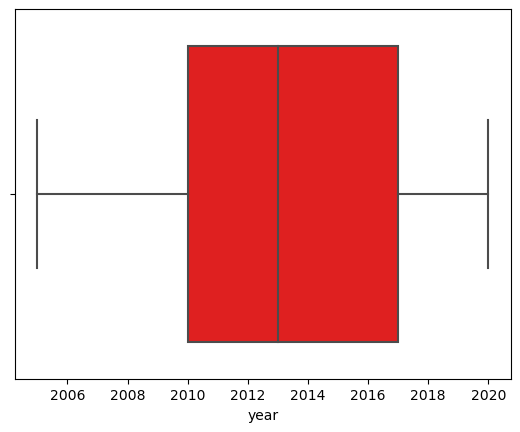

Log GDP per capita


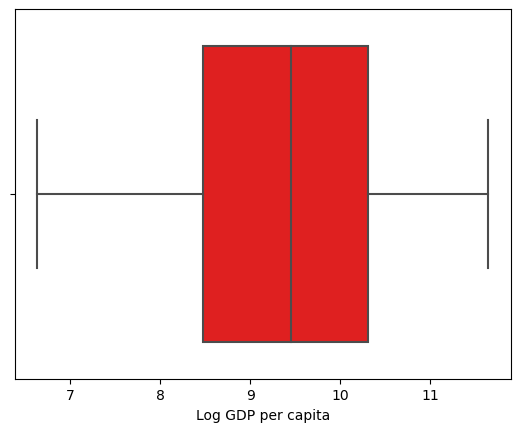

Social support


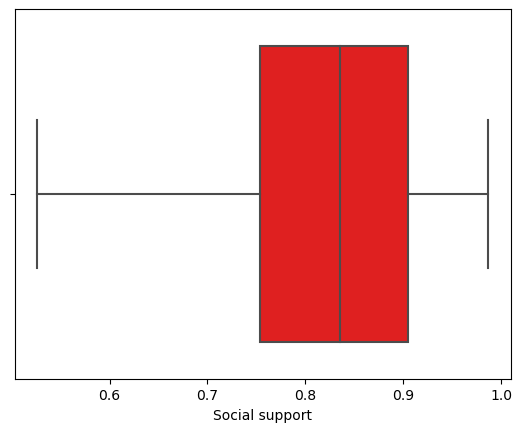

Healthy life expectancy at birth


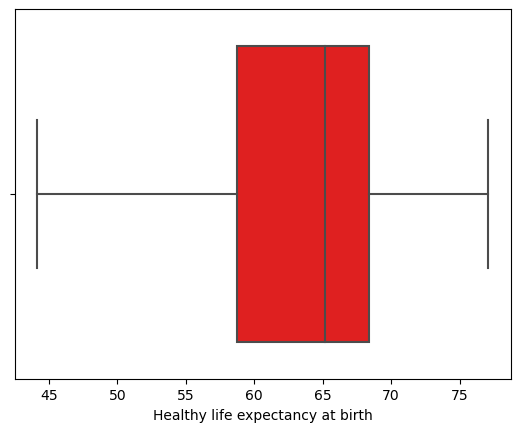

Freedom to make life choices


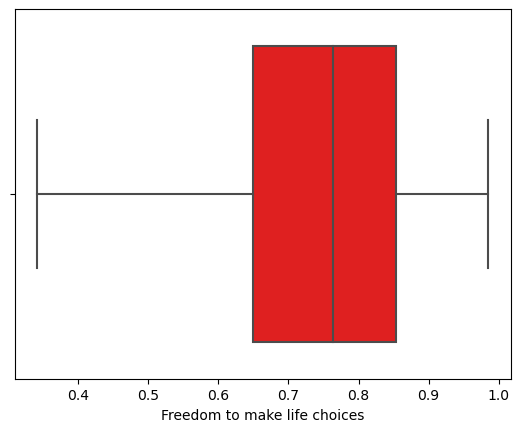

Generosity


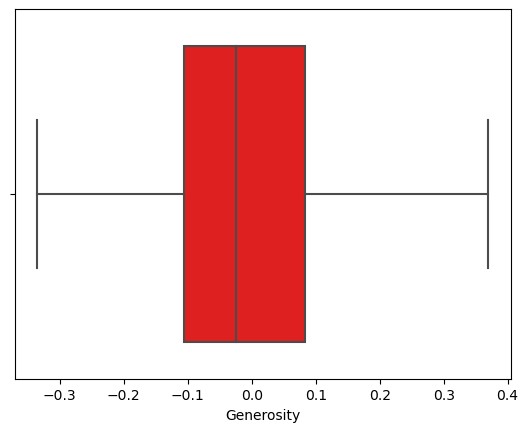

Perceptions of corruption


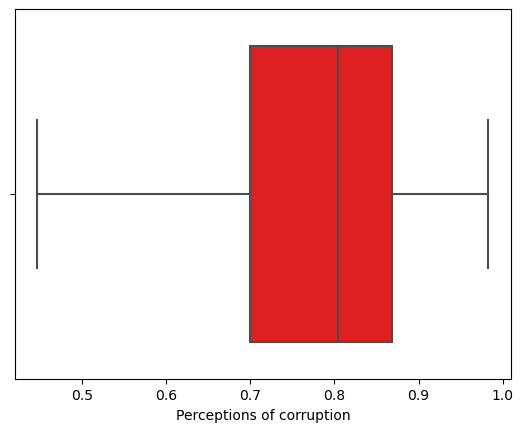

Positive affect


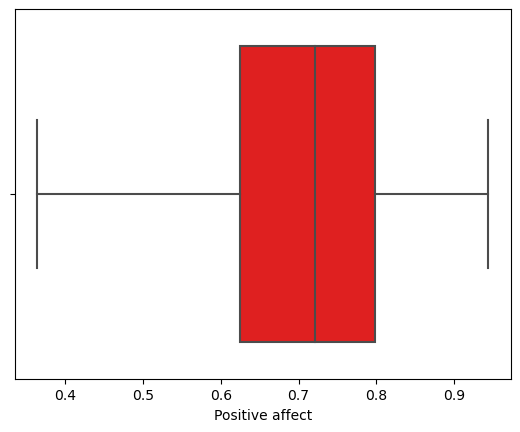

Negative affect


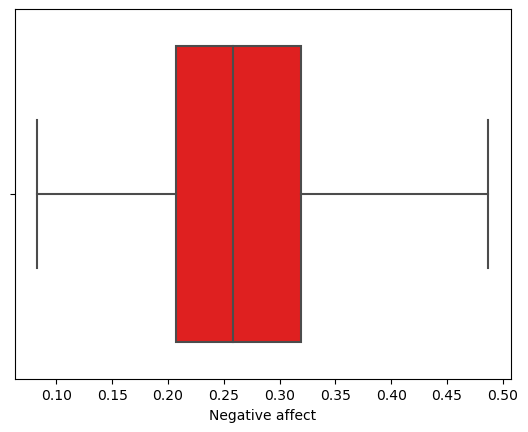

ID


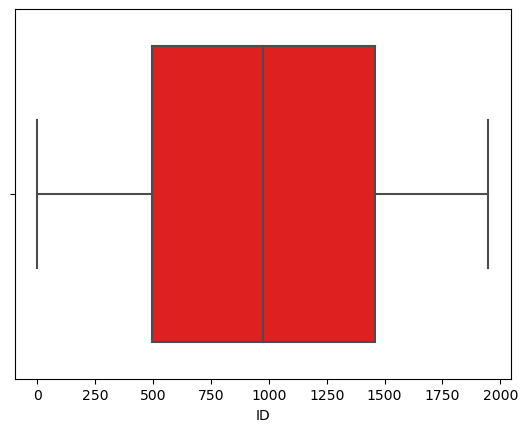

Life Ladder


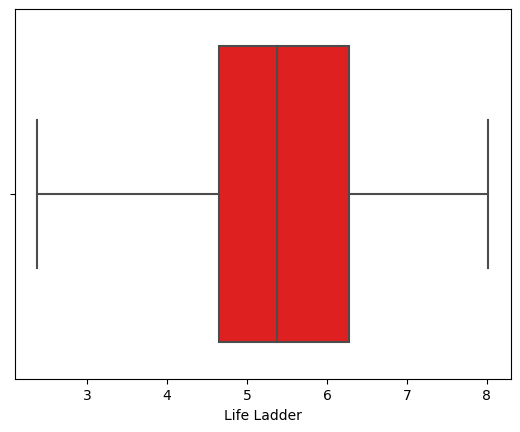

In [23]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [24]:
train_df.head()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,2008,9.343,0.766,64.22,0.763,-0.127,0.70900,0.669,0.331,862,4.930
1,2013,10.299,0.901,67.48,0.754,-0.201,0.72600,0.702,0.199,534,5.367
2,2018,10.881,0.931,72.60,0.942,0.077,0.44675,0.823,0.161,1649,7.375
3,2006,7.554,0.724,60.64,0.702,-0.088,0.76800,0.566,0.195,1682,4.613
4,2014,10.945,0.835,65.80,0.763,-0.025,0.80400,0.721,0.258,925,6.180


In [25]:
train_df.drop('ID', axis = 1, inplace = True)

# Train-Test Split :

In [26]:
x = train_df.drop('Life Ladder', axis = 1)
y = train_df['Life Ladder']

In [27]:
x

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,9.343,0.766,64.220,0.763,-0.127,0.70900,0.669,0.331
1,2013,10.299,0.901,67.480,0.754,-0.201,0.72600,0.702,0.199
2,2018,10.881,0.931,72.600,0.942,0.077,0.44675,0.823,0.161
3,2006,7.554,0.724,60.640,0.702,-0.088,0.76800,0.566,0.195
4,2014,10.945,0.835,65.800,0.763,-0.025,0.80400,0.721,0.258
...,...,...,...,...,...,...,...,...,...
1554,2013,9.192,0.803,62.260,0.658,-0.069,0.94100,0.582,0.261
1555,2015,9.613,0.766,65.145,0.660,-0.047,0.82400,0.620,0.299
1556,2005,9.246,0.920,63.500,0.763,-0.025,0.67000,0.696,0.240
1557,2012,7.428,0.637,57.440,0.835,-0.012,0.44675,0.703,0.132


In [28]:
y

0       4.930
1       5.367
2       7.375
3       4.613
4       6.180
        ...  
1554    5.756
1555    4.976
1556    6.295
1557    3.333
1558    5.554
Name: Life Ladder, Length: 1559, dtype: float64

# Feature Selection :

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 3
Threshold set by Model: 0.11
Important Features: ['Log GDP per capita', 'Healthy life expectancy at birth', 'Positive affect']


# Feature Importance :

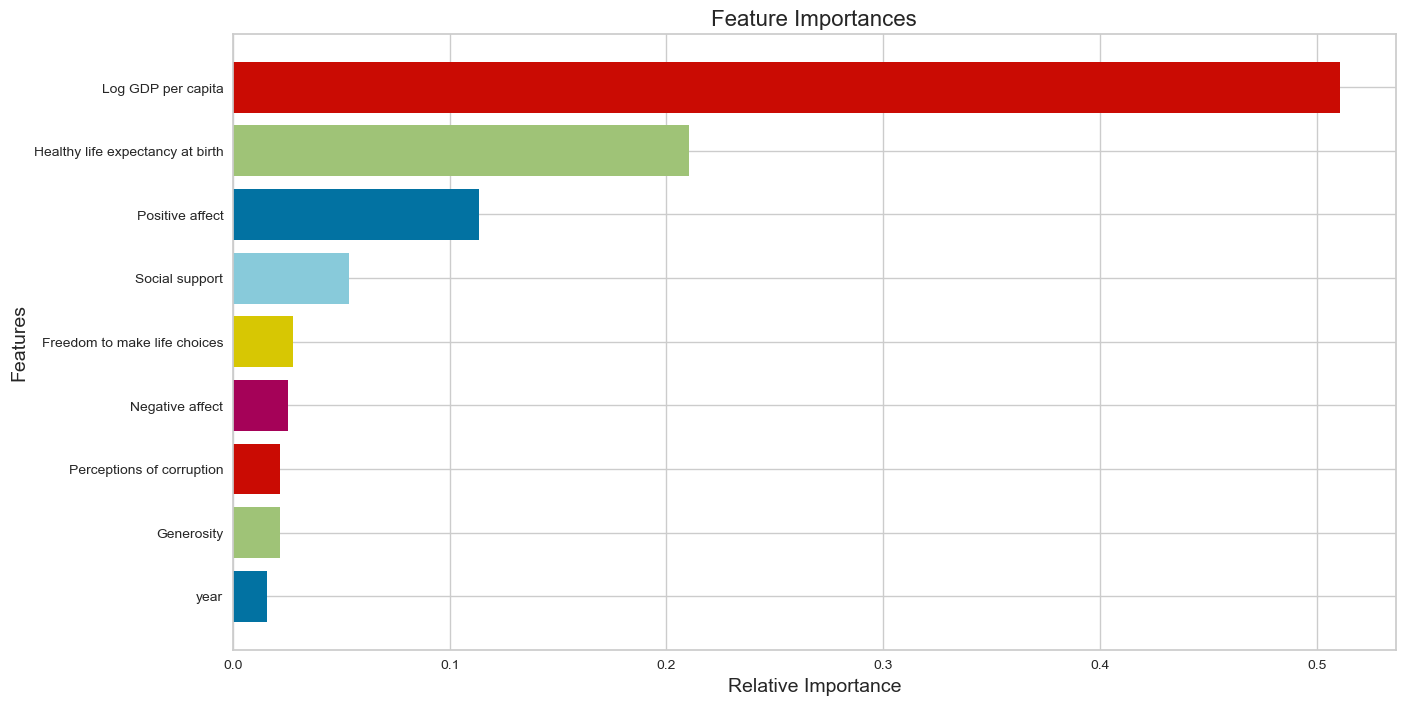

In [30]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

In [82]:
x.drop(['Negative affect', 'Perceptions of corruption', 'Generosity', 'year'], axis = 1, inplace = True)

In [32]:
x.drop('year', axis = 1, inplace = True)

In [33]:
x

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,9.343,0.766,64.220,0.763,-0.127,0.70900,0.669,0.331
1,10.299,0.901,67.480,0.754,-0.201,0.72600,0.702,0.199
2,10.881,0.931,72.600,0.942,0.077,0.44675,0.823,0.161
3,7.554,0.724,60.640,0.702,-0.088,0.76800,0.566,0.195
4,10.945,0.835,65.800,0.763,-0.025,0.80400,0.721,0.258
...,...,...,...,...,...,...,...,...
1554,9.192,0.803,62.260,0.658,-0.069,0.94100,0.582,0.261
1555,9.613,0.766,65.145,0.660,-0.047,0.82400,0.620,0.299
1556,9.246,0.920,63.500,0.763,-0.025,0.67000,0.696,0.240
1557,7.428,0.637,57.440,0.835,-0.012,0.44675,0.703,0.132


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 42)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1247, 8)
(312, 8)
(1247,)
(312,)


In [36]:
#using StandardScaler :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_ = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modelling :

# **Linear Regression :**

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

**Model Evaluation :**

In [37]:
y_pred_lin_train = lin_reg.predict(x_train)
y_pred_lin_test = lin_reg.predict(x_test)

In [38]:
#R2 score on train dataset
R2_score_Linear_train = metrics.r2_score(y_train, y_pred_lin_train)
R2_score_Linear_train

0.7795156071841992

In [39]:
#R2 score on test dataset
R2_score_Linear_test = metrics.r2_score(y_test, y_pred_lin_test)
R2_score_Linear_test

0.7002471493860435

# Decision Tree Regressor :

In [40]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state = 45)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=45)

**Model Evaluation :**

In [41]:
y_pred_dtree_train = dtree.predict(x_train)
y_pred_dtree_test = dtree.predict(x_test)

In [42]:
#R2 score on train dataset
R2_score_dtree_train = metrics.r2_score(y_train, y_pred_dtree_train)
R2_score_dtree_train

1.0

In [43]:
#R2 score on test dataset
R2_score_dtree_test = metrics.r2_score(y_test, y_pred_dtree_test)
R2_score_dtree_test

0.6937643939254305

# Ada Boost Regressor :

In [44]:
from sklearn.ensemble import AdaBoostRegressor

ada_tree = AdaBoostRegressor(base_estimator = dtree, random_state = 123)
ada_tree.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=45),
                  random_state=123)

**Model Evaluation :**

In [45]:
y_pred_ada_train = ada_tree.predict(x_train)
y_pred_ada_test = ada_tree.predict(x_test)

In [46]:
#R2 score on train dataset
R2_score_adaTree_train = metrics.r2_score(y_train, y_pred_ada_train)
R2_score_adaTree_train

0.999572933801988

In [47]:
#R2 score on test dataset
R2_score_adaTree_test = metrics.r2_score(y_test, y_pred_ada_test)
R2_score_adaTree_test

0.8326160264934477

# Random Forest Regressor :

In [48]:
from sklearn.ensemble import RandomForestRegressor

clf_rand = RandomForestRegressor(random_state = 42)
clf_rand.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

**Model Evaluation :**

In [49]:
y_pred_rf_train = clf_rand.predict(x_train)
y_pred_rf_test = clf_rand.predict(x_test)

In [50]:
#R2 score on train dataset
R2_score_rf_train = metrics.r2_score(y_train, y_pred_rf_train)
R2_score_rf_train

0.9808601677135832

In [51]:
#R2 score on test dataset
R2_score_rf_test = metrics.r2_score(y_test, y_pred_rf_test)
R2_score_rf_test

0.8210526594028338

# Bagging Regressor :

In [52]:
clf_bagrf = RandomForestRegressor(random_state = 42)


from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(base_estimator = clf_bagrf, n_estimators = 10)
bag_clf.fit(x_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(random_state=42))

**Model Evaluation :**

In [53]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

In [54]:
#R2 score on train dataset
R2_score_bag_train = metrics.r2_score(y_train, y_pred_bag_train)
R2_score_bag_train

0.9478843197538084

In [55]:
#R2 score on test dataset
R2_score_bag_test = metrics.r2_score(y_test, y_pred_bag_test)
R2_score_bag_test

0.8126992681979337

# GradientBoostingRegressor :

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators = 100)
grad_reg.fit(x_train, y_train)

GradientBoostingRegressor()

**Model Evaluation :**

In [57]:
y_pred_Grad_train = grad_reg.predict(x_train)
y_pred_Grad_test = grad_reg.predict(x_test)

In [58]:
#R2 score on train dataset
R2_score_grad_train = metrics.r2_score(y_train, y_pred_Grad_train)
R2_score_grad_train

0.9010628244742498

In [59]:
#R2 score on test dataset
R2_score_grad_test = metrics.r2_score(y_test, y_pred_Grad_test)
R2_score_bag_test

0.8126992681979337

# Xgb Regressor :

In [60]:
import xgboost as xgb

In [61]:
xgb_cl = xgb.XGBRegressor()
xgb_cl.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

**Model Evaluation :**

In [62]:
y_pred_xg_train = xgb_cl.predict(x_train)
y_pred_xg_test = xgb_cl.predict(x_test)

In [63]:
#R2 score on train dataset
R2_score_xg_train = metrics.r2_score(y_train, y_pred_xg_train)
R2_score_xg_train

0.9989177260177137

In [64]:
#R2 score on test dataset
R2_score_xg_test = metrics.r2_score(y_test, y_pred_xg_test)
R2_score_xg_test

0.7748926233740385

In [65]:
models = pd.DataFrame({ 'Model': ['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'Bagging Regressor','Gradient Boosting','XGBoost Regressor'],
                       'Training R2_Score': [R2_score_Linear_train, R2_score_dtree_train, R2_score_adaTree_train,
                                         R2_score_rf_train, R2_score_bag_train, R2_score_grad_train,
                                            R2_score_xg_train],
                       
                       'Testing R2_Score': [R2_score_Linear_test, R2_score_dtree_test, R2_score_adaTree_test, R2_score_rf_test, R2_score_bag_test, R2_score_grad_test,
                                          R2_score_xg_test]})
models.sort_values(by = ['Training R2_Score', 'Testing R2_Score'], ascending = False, ignore_index = True)

,Model,Training R2_Score,Testing R2_Score
0,Decision Tree Regressor,1.000000,0.693764
1,ADABoost Regressor,0.999573,0.832616
2,XGBoost Regressor,0.998918,0.774893
3,Random Forest Regressor,0.980860,0.821053
4,Bagging Regressor,0.947884,0.812699
5,Gradient Boosting,0.901063,0.769858
6,Linear Regressor,0.779516,0.700247


# Kfold Cross Validation :

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [67]:
Regressors = []

Regressors.append(LinearRegression())
Regressors.append(DecisionTreeRegressor())
Regressors.append(AdaBoostRegressor())
Regressors.append(RandomForestRegressor())
Regressors.append(BaggingRegressor(n_estimators = 10))
Regressors.append(GradientBoostingRegressor())
Regressors.append(xgb.XGBRegressor())

In [68]:
cv_results = []

for Regressor in Regressors:
    cv_results.append(cross_val_score(Regressor, x_train, y_train, scoring = 'r2', cv = 5))

In [69]:
cv_results

[array([0.77392603, 0.77369837, 0.76336394, 0.79726922, 0.76235028]),
 array([0.7162019 , 0.74573011, 0.65972061, 0.7199642 , 0.74097069]),
 array([0.80148908, 0.80222803, 0.80458853, 0.80688744, 0.79921906]),
 array([0.84288302, 0.87126019, 0.85391926, 0.86169585, 0.85282532]),
 array([0.82094551, 0.84640357, 0.83140994, 0.84817298, 0.84500215]),
 array([0.8279929 , 0.83765298, 0.8106153 , 0.83924024, 0.83514458]),
 array([0.82984054, 0.85300678, 0.84142559, 0.84583956, 0.83163842])]

In [70]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [71]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'Bagging Regressor','Gradient Boosting','XGBoost Regressor']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.856517,0.009492,Random Forest Regressor
1,0.840350,0.008693,XGBoost Regressor
2,0.838387,0.010552,Bagging Regressor
3,0.830129,0.010489,Gradient Boosting
4,0.802882,0.002636,ADABoost Regressor
5,0.774122,0.012572,Linear Regressor
6,0.716518,0.030624,Decision Tree Regressor


# Random Forest Tuning :

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = { 
            "n_estimators"      : [10,20,30, 100, 300, 500, 600, 1000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,3, 4, 5, 6, 7, 8, 11],
            "bootstrap": [True, False],
            
            }

In [74]:
rfr_clf = RandomForestRegressor()

In [75]:
grid_search = GridSearchCV(rfr_clf, param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring = 'r2')
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 11],
                         'n_estimators': [10, 20, 30, 100, 300, 500, 600,
                                          1000]},
             scoring='r2', verbose=2)

In [76]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300)

In [77]:
rfr_clf = RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300)
rfr_clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300)

**Model evaluation :**

In [78]:
y_pred_GridR_train = rfr_clf.predict(x_train)
y_pred_GridR_test = rfr_clf.predict(x_test)

In [79]:
#R2 score on train dataset
R2_score_GridR_train = metrics.r2_score(y_train, y_pred_GridR_train)
R2_score_GridR_train

1.0

In [80]:
#R2 score on test dataset
R2_score_GridR_test = metrics.r2_score(y_test, y_pred_GridR_test)
R2_score_GridR_test

0.8339139126492429

In [ ]:
Log GDP per capita	Social support	Healthy life expectancy at birth	Freedom to make life choices	Generosity	Perceptions of corruption	Positive affect	Negative

In [103]:
test_df = pd.read_csv('test_data.csv')

In [104]:
test_df.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
0,Spain,2020,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317,1614
1,Poland,2017,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203,1405
2,Lebanon,2012,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339,974
3,Malaysia,2011,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155,1055
4,Canada,2020,10.730,0.931,74.00,0.887,0.050,0.434,0.796,0.307,307


In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    int64  
 2   Log GDP per capita                380 non-null    float64
 3   Social support                    387 non-null    float64
 4   Healthy life expectancy at birth  372 non-null    float64
 5   Freedom to make life choices      380 non-null    float64
 6   Generosity                        372 non-null    float64
 7   Perceptions of corruption         366 non-null    float64
 8   Positive affect                   385 non-null    float64
 9   Negative affect                   388 non-null    float64
 10  ID                                390 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 33.6+ KB


In [106]:
test_df.isna().sum()

Country name                         0
year                                 0
Log GDP per capita                  10
Social support                       3
Healthy life expectancy at birth    18
Freedom to make life choices        10
Generosity                          18
Perceptions of corruption           24
Positive affect                      5
Negative affect                      2
ID                                   0
dtype: int64

In [107]:
test_df['Log GDP per capita'].fillna(test_df['Log GDP per capita'].median(), inplace = True)
test_df['Social support'].fillna(test_df['Social support'].median(), inplace = True)
test_df['Healthy life expectancy at birth'].fillna(test_df['Healthy life expectancy at birth'].median(), inplace = True)
test_df['Freedom to make life choices'].fillna(test_df['Freedom to make life choices'].median(), inplace = True)
test_df['Generosity'].fillna(test_df['Generosity'].median(), inplace = True)
test_df['Perceptions of corruption'].fillna(test_df['Perceptions of corruption'].median(), inplace = True)
test_df['Positive affect'].fillna(test_df['Positive affect'].median(), inplace = True)
test_df['Negative affect'].fillna(test_df['Negative affect'].median(), inplace = True)

In [108]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    int64  
 2   Log GDP per capita                390 non-null    float64
 3   Social support                    390 non-null    float64
 4   Healthy life expectancy at birth  390 non-null    float64
 5   Freedom to make life choices      390 non-null    float64
 6   Generosity                        390 non-null    float64
 7   Perceptions of corruption         390 non-null    float64
 8   Positive affect                   390 non-null    float64
 9   Negative affect                   390 non-null    float64
 10  ID                                390 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 33.6+ KB


In [109]:
test_df.drop(['Country name', 'year'], axis = 1, inplace = True)

In [110]:
test_df.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
0,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317,1614
1,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203,1405
2,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339,974
3,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155,1055
4,10.730,0.931,74.00,0.887,0.050,0.434,0.796,0.307,307


Log GDP per capita


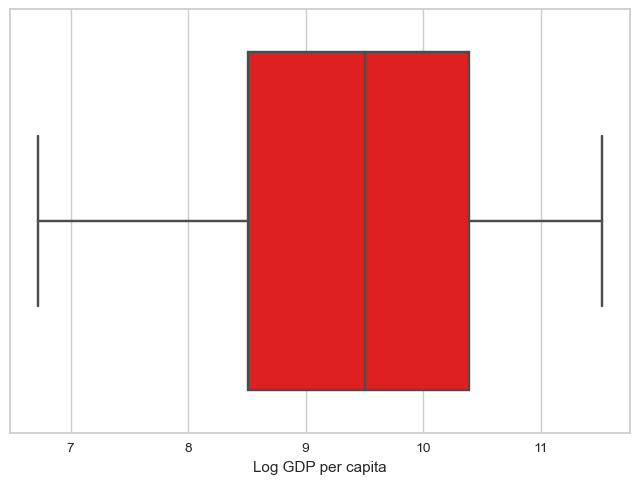

Social support


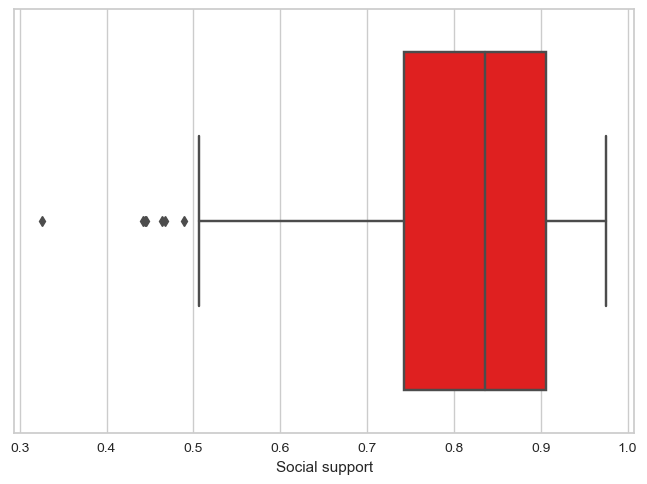

Healthy life expectancy at birth


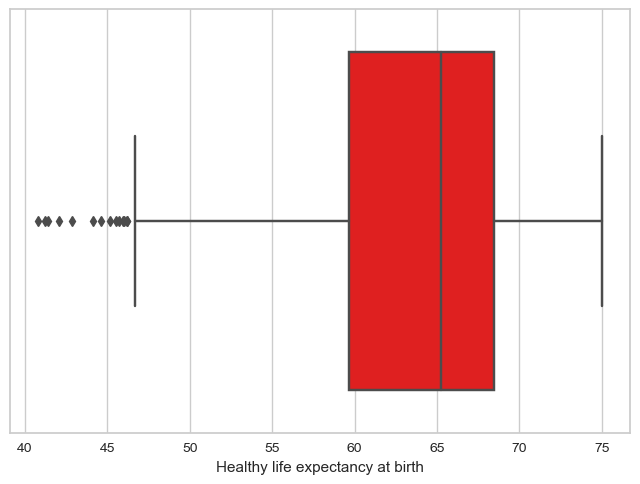

Freedom to make life choices


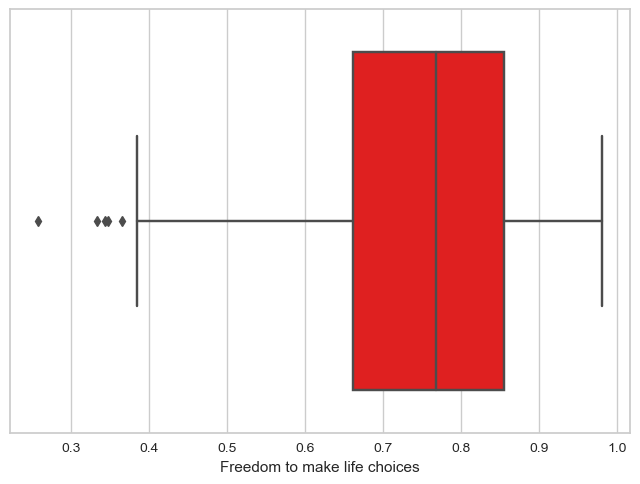

Generosity


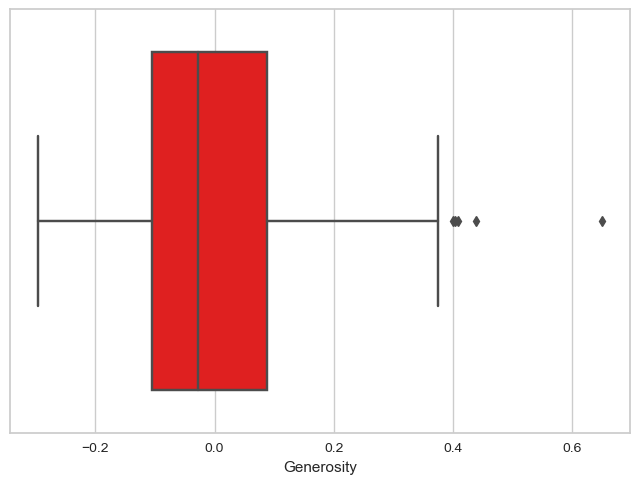

Perceptions of corruption


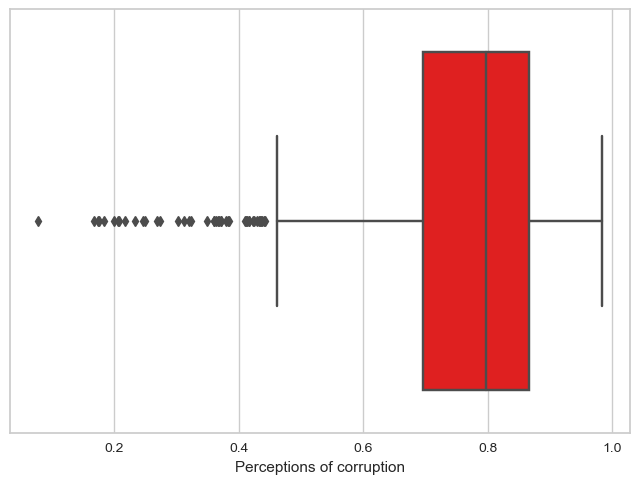

Positive affect


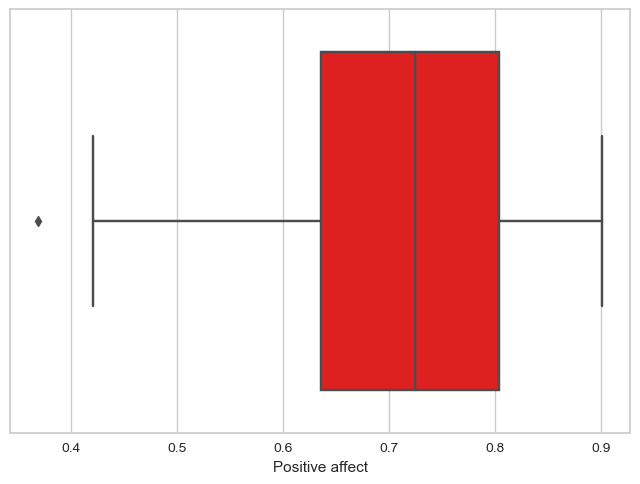

Negative affect


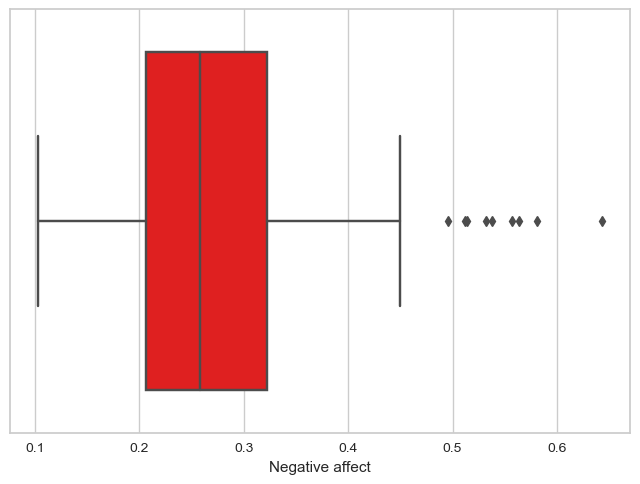

ID


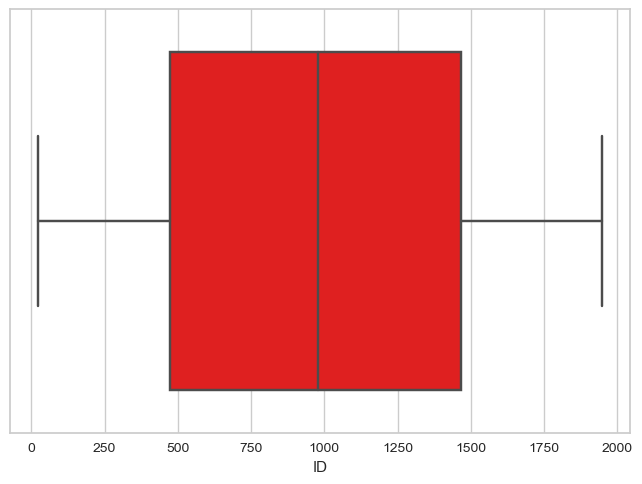

In [111]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [112]:
def get_bounds(test_df, col):
    Q1 = test_df[col].quantile(0.25)
    Q3 = test_df[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [113]:
num_cols = ['Perceptions of corruption', 'Positive affect', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices',
           'Generosity', 'Negative affect']

In [114]:
for col in num_cols:
    Upper, Lower = get_bounds(test_df, col)
    test_df[col] = np.where(test_df[col]>Upper, Upper, test_df[col])
    test_df[col] = np.where(test_df[col]<Lower, Lower, test_df[col])

Log GDP per capita


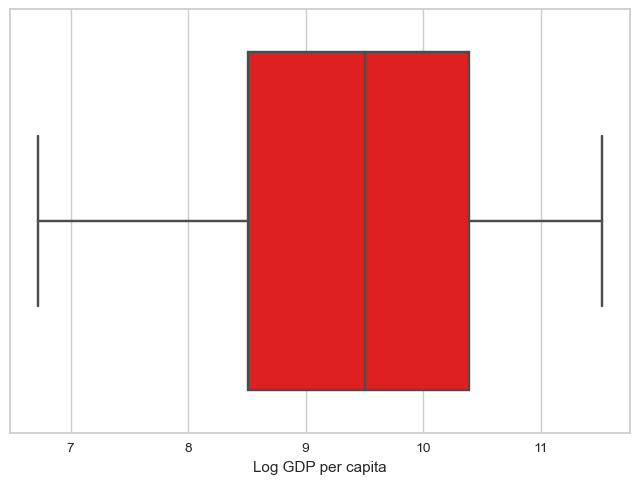

Social support


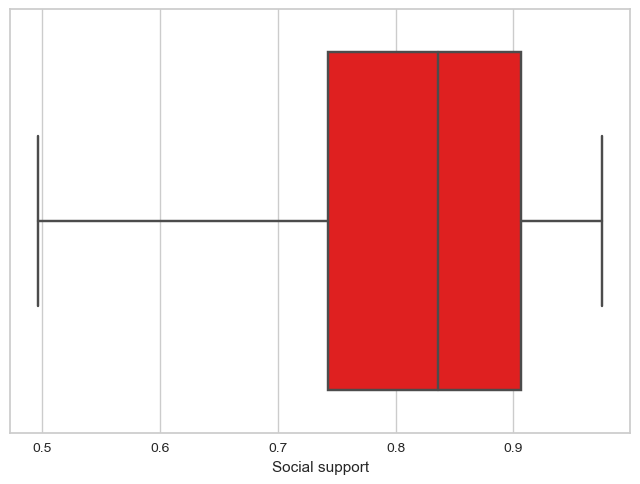

Healthy life expectancy at birth


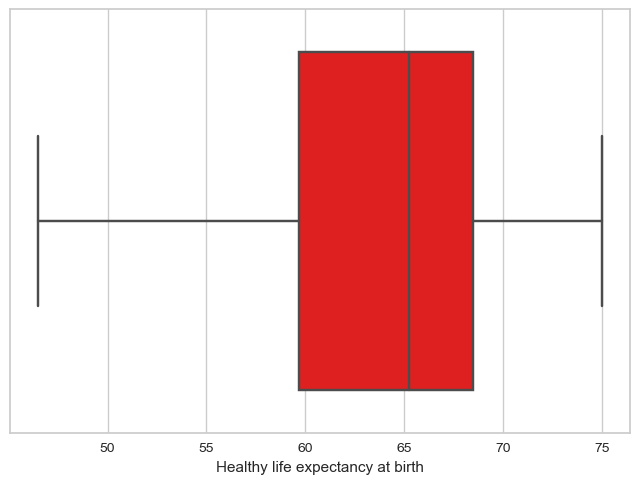

Freedom to make life choices


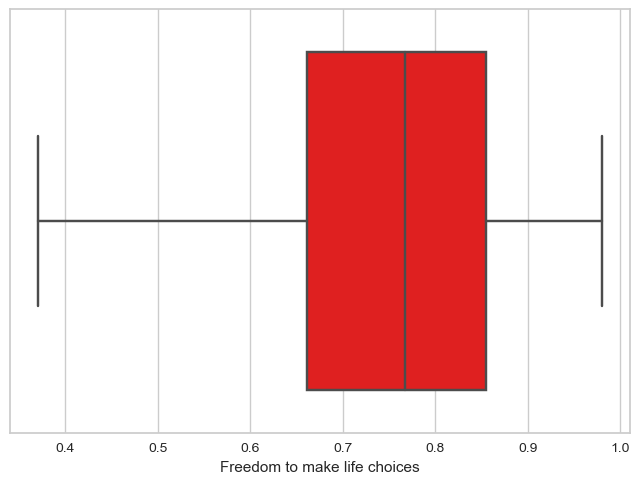

Generosity


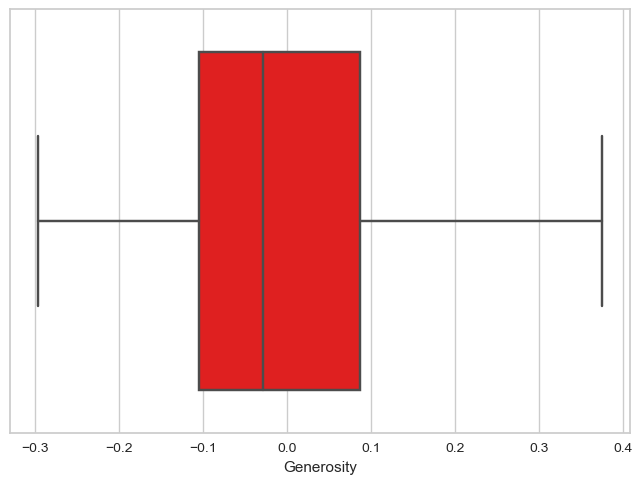

Perceptions of corruption


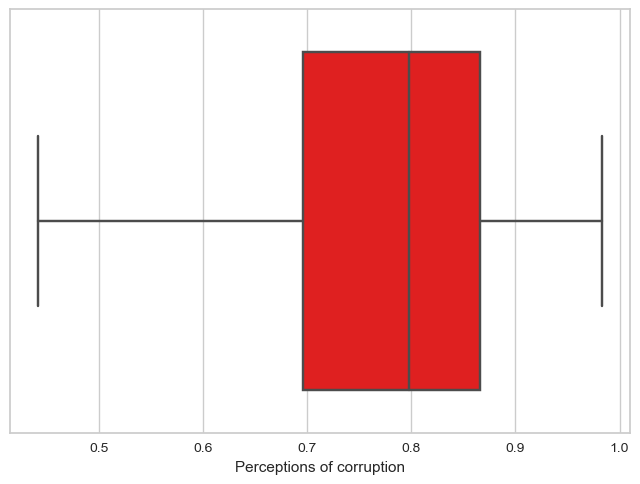

Positive affect


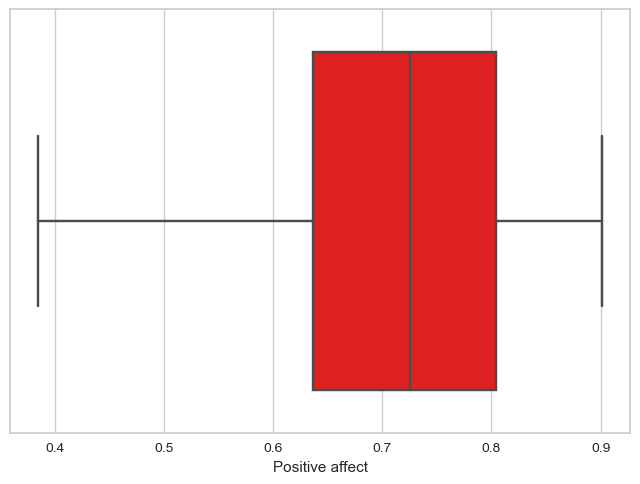

Negative affect


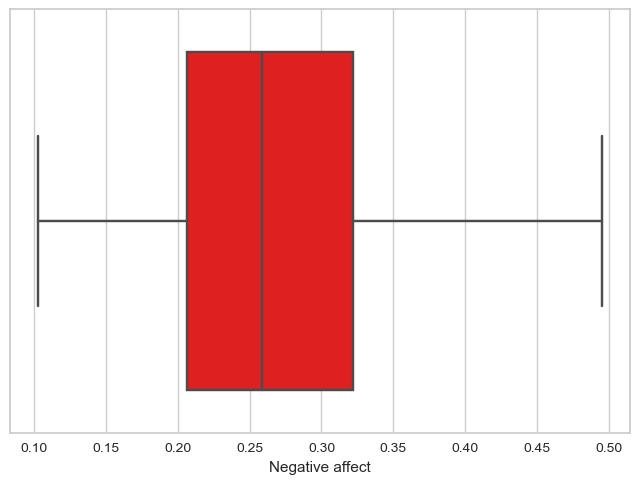

ID


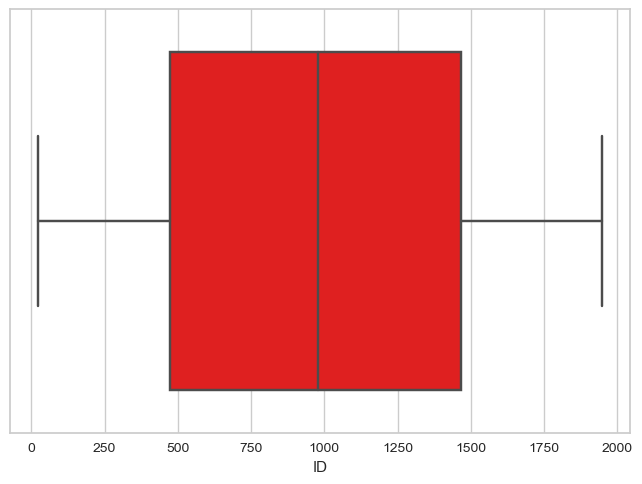

In [115]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [116]:
df_test = test_df.iloc[:, 0:8]

In [117]:
df_test.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317
1,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203
2,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339
3,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155
4,10.730,0.931,74.00,0.887,0.050,0.442,0.796,0.307


In [118]:
predict = rfr_clf.predict(df_test)

In [119]:
test_df['Life Ladder'] = predict

In [120]:
test_df.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317,1614,6.287217
1,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203,1405,5.951543
2,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339,974,4.922917
3,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155,1055,6.142270
4,10.730,0.931,74.00,0.887,0.050,0.442,0.796,0.307,307,6.987357


In [121]:
test_df.to_csv('submissionHappy.csv', index = False, header = False)